# Wiktor Ligęza IO gr.lab 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sy
from sympy.parsing.sympy_parser import (parse_expr,
standard_transformations, implicit_application)

#### wprowadzanie danych początkowych

In [2]:
tol = np.float32(input("Wprowadź wartość tol: "))

Wprowadź wartość tol: 0.000001


In [3]:
iloscIteracji = int(input("Podaj maksymalną ilość iteracji: "))

Podaj maksymalną ilość iteracji: 100


# Stycznych

#### wprowadzanie funkcji

In [55]:
funkcja = input("(np: 2^2 = 2**2, 2a = 2*a, cot(a) = cot a)podaj funkcję: ")
transformations = standard_transformations + (implicit_application,)
y = parse_expr(funkcja, transformations=transformations)
y

(np: 2^2 = 2**2, 2a = 2*a, cot(a) = cot a)podaj funkcję: 2*x**3-9.5*x+7.5


2*x**3 - 9.5*x + 7.5

#### obliczanie pochodnej

In [56]:
yprim = sy.Derivative(y)
yprim = yprim.doit()
yprim

6*x**2 - 9.5

In [57]:
x = sy.symbols("x")
y = sy.lambdify(x, y)
yprim = sy.lambdify(x, yprim)

#### wprowadzanie punktu zgadywanego

In [58]:
x = np.float32(input("Wprowadź wartość x: "))

Wprowadź wartość x: 5


In [75]:
def metodaNewtona_Raphsona(y,yprim,x,tol,iloscIteracji):
    green = [[x,y(x)]] #x1
    yellow =[] #root
    violet =[] #xprim
    for i in range(iloscIteracji):
        xprim = x - y(x)/yprim(x)
        violet.append([xprim,y(xprim)])
        if abs(xprim-x) < tol: 
            break
        x = xprim
        
    #output
    print("pierwiastek znajduje sie w x: ",xprim)
    print("ilosc iteracji: ", i)
    yellow.append([xprim,y(xprim)])
    #plot
    x_list = np.linspace(0,6,100)
    x_list[0] = 0.00001
    fplot = list(map(y, x_list))
    plt.plot(x_list, fplot)
    #x
    x, y = list(zip(*green))
    plt.scatter(x, y, c='r')
    #xprim           
    x, y = list(zip(*violet))
    plt.scatter(x, y, c='m')
    #result           
    x, y = list(zip(*yellow))
    plt.scatter(x, y, c='y')

#### wynik

pierwiastek znajduje sie w x:  1.4999999999999998
ilosc iteracji:  8


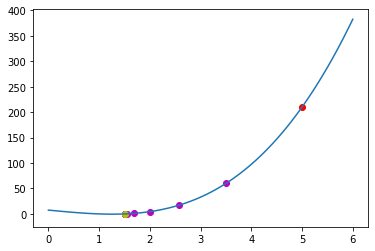

In [76]:
metodaNewtona_Raphsona(y,yprim,x,tol,iloscIteracji)

Kolor czerowny x, żółty wynik, fioletowy x'

# Siecznych

#### wprowadzanie danych

In [83]:
x1 = np.float32(input("Wprowadź wartość x1: "))

Wprowadź wartość x1: 0


In [84]:
x2 = np.float32(input("Wprowadź wartość x2: "))

Wprowadź wartość x2: 2


#### wprowadzanie funkcji

In [79]:
funkcja = input("(np: 2^2 = 2**2, 2a = 2*a, cot(a) = cot a)podaj funkcję: ")
transformations = standard_transformations + (implicit_application,)
y = parse_expr(funkcja, transformations=transformations)
y

(np: 2^2 = 2**2, 2a = 2*a, cot(a) = cot a)podaj funkcję: 2*x**2-5*x+3


2*x**2 - 5*x + 3

In [80]:
x = sy.symbols("x")
y = sy.lambdify(x, y)

In [96]:
def metodaEulera(y,x1,x2,tol,iloscIteracji):
    red = [[x1,y(x1)]] #x2
    green = [[x2,y(x2)]] #x1
    yellow =[] #root
    violet =[] #xprim
    for i in range(iloscIteracji):
        xprim = x2-(x2-x1)/(y(x2)-y(x1))*y(x2)
        violet.append([xprim,y(xprim)])
        if abs(xprim-x2) < tol:
            break
        else: 
            x1 = x2
            x2 = xprim
            
    #output
    print("pierwiastek znajduje sie w x: ",xprim)
    print("ilosc iteracji: ", i)
    yellow.append([xprim,y(xprim)])
    #plot
    x_list = np.linspace(0,3,100)
    x_list[0] = 0.00001
    fplot = list(map(y, x_list))
    plt.plot(x_list, fplot)
    #x1
    x, y = list(zip(*green))
    plt.scatter(x, y, c='r')
    #x2
    x, y = list(zip(*red))
    plt.scatter(x, y, c='g')
    #xprim           
    x, y = list(zip(*violet))
    plt.scatter(x, y, c='m')
     #result           
    x, y = list(zip(*yellow))
    plt.scatter(x, y, c='y')

#### wynik

pierwiastek znajduje sie w x:  1.5000000000134721
ilosc iteracji:  8


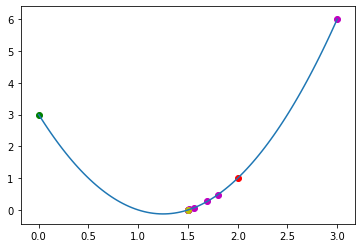

In [97]:
metodaEulera(y,x1,x2,tol,iloscIteracji)

Kolor zielony oznacza x1, czerowny x2, żółty wynik, fioletowy x'

### test data
tol: 0.000001
iteracje: 100
##### styczne
x: 5
y: 2*x**3-9.5*x+7.5
##### sieczne
x1: 0
x2: 2
y: 2*x**2-5*x+3